# DATA MINING PROJECT - CHURN RATE

# 1. Import the necessary packages and dataset

In [49]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder


In [50]:
# import the dataset
df = pd.read_csv("./dataset.csv")

In [51]:
# have a glimse of how the raw data looks
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# 2. Exploring the data

#### 2.1 Shape of the data

In [52]:
# Number of rows and columns in the dataset
df.shape

(7043, 16)

#### 2.2 Check for Missing values and NaNs

* We can check for this in two ways and for 100% confidence, we will do both

In [53]:
# count() returns the number of truthy values in each of the dataframe columns
print(df.count())
# isnull() returns True for falsy values and False for truthy values and sum() returns the sum of truthy values in the series
print(df.isnull().sum())

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
StreamingService    7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
StreamingService    0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<h4><i>Observations</i></h4>

* We observe that there are no missing values in any of the columns

#### 2.3 Is the dataset suffering from class imbalance problem?

* In the given raw data, let us check how many records are in for **Churn=Yes** and **Churn=No**

In [55]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<h4><i>Observations</i></h4>

* There are 5174 records available for **Churn=No** but only 1869 for **Churn=Yes**
* This is an example of *imbalanced data* which can potentially affect the model we are going to build


#### 2.4 Exploring the numeric columns

In [56]:
# We filter out the columns we are interested in
df[['tenure', 'MonthlyCharges', 'Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
No,37.569965,61.265124
Yes,17.979133,74.441332


<h4><i>Observations</i></h4>

* When the tenure is long, churn rate is less
* When the Monthly charges is high, churn rate is high

In [58]:
df[['tenure', 'MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


<h4><i>Observations</i></h4>

* We see that the average tenure is 32 years and average monthly charges is $64

#### 2.5 Data types of attributes present in our dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   StreamingService  7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

<h4><i>Observations</i></h4>

1. customerID - categorical (nominal)
2. gender - asymmetric binary
3. SeniorCitizen - symmetric binary
4. Partner - symmetric binary
5. Dependents - numeric binary
6. tenure - numeric
7. PhoneService - symmetric binary
8. MultipleLines - categorical (nominal)
9. InternetService - categorical (nominal)
10. StreamingService - categorical (nominal)
11. Contract - categorical (nominal)
12. PaperlessBilling - symmetric binary
13. PaymentMethod - categorical (nominal)
14. MonthlyCharges - numeric
15. TotalCharges - numeric
16. Churn - symmetric binary

#### 2.6 Correlation between Churn and other attributes

-- Let us validate each column if they influence the Churn rate

<h4>Gender</h4>

In [60]:
pd.crosstab(df.gender,df.Churn)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


##### The same data we see above, let us visualise in graph

<AxesSubplot:xlabel='gender'>

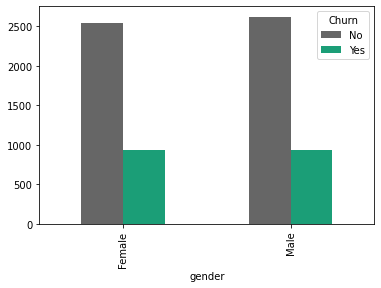

In [61]:
pd.crosstab(df.gender,df.Churn).plot(kind='bar', colormap="Dark2_r")

* We find that "Gender" doesn't influence the "Churn" attribute as both genders have similar pattern. This implies we can drop the gender column

<h4>SeniorCitizen</h4>

In [62]:
pd.crosstab(df.SeniorCitizen,df.Churn)

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


##### The same data we see above let us visualise in graph

<AxesSubplot:xlabel='SeniorCitizen'>

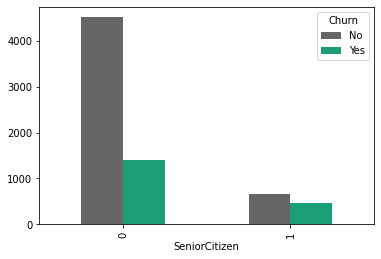

In [63]:
pd.crosstab(df.SeniorCitizen,df.Churn).plot(kind='bar', colormap="Dark2_r")

<h4>Partner</h4>

<AxesSubplot:xlabel='Partner'>

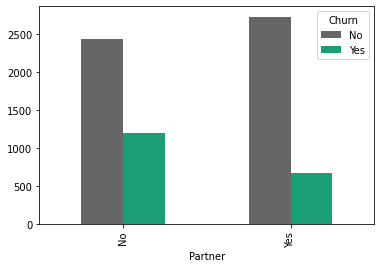

In [64]:
pd.crosstab(df.Partner,df.Churn).plot(kind='bar', colormap="Dark2_r")

* We observe that having a partner doesn't actually influence the churn rate. So we can drop

<h4>Dependents</h4>

<AxesSubplot:xlabel='Dependents'>

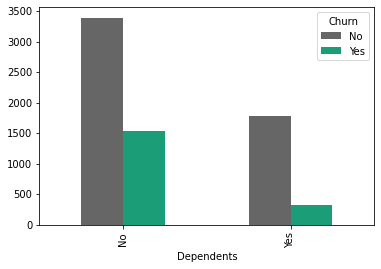

In [65]:
pd.crosstab(df.Dependents,df.Churn).plot(kind='bar', colormap="Dark2_r")

* We observe that when there are no dependents the churn rate is increased. So we will consider this attribute in our model

<h4>PhoneService</h4>

<AxesSubplot:xlabel='PhoneService'>

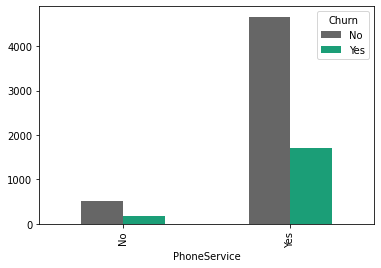

In [71]:
pd.crosstab(df.PhoneService,df.Churn).plot(kind='bar', colormap="Dark2_r")

* Having a phone service influences the churn rate. So we will consider this in our model

### InternetService

<AxesSubplot:xlabel='InternetService'>

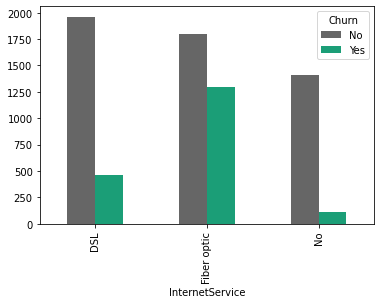

In [72]:
pd.crosstab(df.InternetService,df.Churn).plot(kind='bar', colormap="Dark2_r")

### PaperlessBilling

<AxesSubplot:xlabel='PaperlessBilling'>

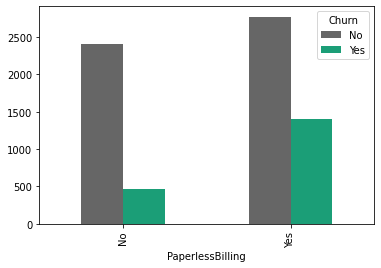

In [73]:
pd.crosstab(df.PaperlessBilling,df.Churn).plot(kind='bar', colormap="Dark2_r")

Since we observe that a paperless billing contributes to churn rate, we will consider this in our model

### MultipleLines

<AxesSubplot:xlabel='MultipleLines'>

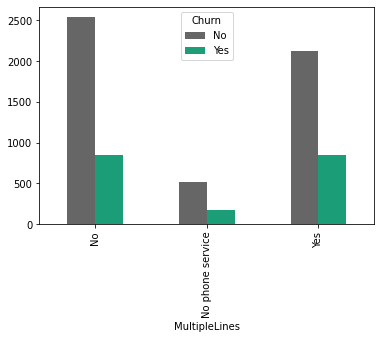

In [74]:
pd.crosstab(df.MultipleLines,df.Churn).plot(kind='bar', colormap="Dark2_r")

* We observe that having multiple line doesn't actually influence the churn rate. So we can drop

### StreamingService

<AxesSubplot:xlabel='StreamingService'>

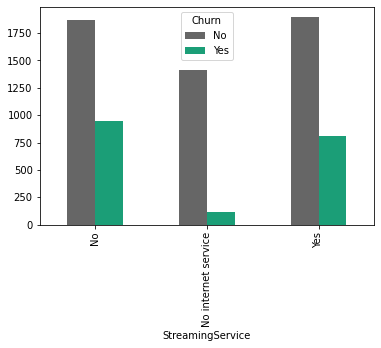

In [75]:
pd.crosstab(df.StreamingService,df.Churn).plot(kind='bar', colormap="Dark2_r")

* We observe that streaming service is also not affectin

# 3. Clean the data

### Remove unwanted columns

In [76]:
# As we observed from our Step 2, we remove those columns that don't considerably affect the Churn value
df.drop(columns=['customerID', 'gender', 'Partner', 'MultipleLines', 'StreamingService'], inplace=True)
df.head()

,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,34,Yes,DSL,One year,No,Mailed check,56.95,1889.5,No
2,0,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Convert categorical field to numerical field

* Use labelencoder() for target attribute
* Use replace() for features

In [77]:
df.PhoneService.replace('Yes', 1, inplace=True)
df.PhoneService.replace('No', 0, inplace=True)
df.Dependents.replace('Yes', 1, inplace=True)
df.Dependents.replace('No', 0, inplace=True)
df.PaperlessBilling.replace('Yes', 1, inplace=True)
df.PaperlessBilling.replace('No', 0, inplace=True)

le = LabelEncoder()
df['Churn'] = le.fit_transform(df.Churn)

In [78]:
df.head(2)

,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,34,1,DSL,One year,0,Mailed check,56.95,1889.5,0


***
We use **Hot Encoding** technique to convert certain categorical attributes with more than 2 types of unique value to numeric attributes
***

In [79]:
# Convert InternetService to numerical attribute
dummies = pd.get_dummies(df.InternetService, prefix="InternetService")
merged = pd.concat([df, dummies], axis="columns")
final = merged.drop(['InternetService'], axis="columns")

In [80]:
# Convert Contract to numerical attribute
dummies = pd.get_dummies(final.Contract, prefix="Contract")
merged = pd.concat([final, dummies], axis="columns")
final = merged.drop(['Contract'], axis="columns")

In [82]:
# Convert PaymentMethod to numerical attribute
dummies = pd.get_dummies(final.PaymentMethod, prefix="PaymentMethod")
merged = pd.concat([final, dummies], axis="columns")
final = merged.drop(['PaymentMethod'], axis="columns")

In [84]:
final.drop(columns=['InternetService_No', 'Contract_Two year', 'PaymentMethod_Electronic check'], inplace=True)
final.head()

,SeniorCitizen,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check
0,0,0,1,0,1,29.85,29.85,0,1,0,1,0,0,0,0
1,0,0,34,1,0,56.95,1889.5,0,1,0,0,1,0,0,1
2,0,0,2,1,1,53.85,108.15,1,1,0,1,0,0,0,1
3,0,0,45,0,0,42.30,1840.75,0,1,0,0,1,1,0,0
4,0,0,2,1,1,70.70,151.65,1,0,1,1,0,0,0,0


### Clean numeric data and normalise

In [85]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Dependents                               7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   PhoneService                             7043 non-null   int64  
 4   PaperlessBilling                         7043 non-null   int64  
 5   MonthlyCharges                           7043 non-null   float64
 6   TotalCharges                             7043 non-null   object 
 7   Churn                                    7043 non-null   int64  
 8   InternetService_DSL                      7043 non-null   uint8  
 9   InternetService_Fiber optic              7043 non-null   uint8  
 10  Contract_Month-to-month                  7043 no

***
We observe from above that *TotalCharges* is of type *String*. So we need to first convert in into numeric type before normalising it
***

In [86]:
final["TotalCharges"] = final["TotalCharges"].str.strip(' ')
final["TotalCharges"] = pd.to_numeric(final.TotalCharges)

* Drop rows with NA value in any column

In [87]:
final.dropna(axis=0, inplace=True)

### Using lambda function to apply min-max normalisation

In [88]:
# Select all the columns that require to be normalised
X_Data = final[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [89]:
X_Data = X_Data.apply( lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
final.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
final['tenure'] = X_Data['tenure']
final['MonthlyCharges'] = X_Data['MonthlyCharges']
final['TotalCharges'] = X_Data['TotalCharges']

### Let us see how balanced our data is after cleaning

In [90]:
final.shape

(7032, 15)

In [91]:
churn_yes = final[final.Churn==1]
churn_yes.shape

(1869, 15)

In [92]:
churn_no = final[final.Churn==0]
churn_no.shape

(5163, 15)

***
 * We observe here that in our final clean dataset, we have **data imbalance** problem
 * We have 5163 records for Churn=No
 * We have 1869 records for Churn=Yes
***

# 4. Build a model

* In our problem we ave to decide if the churn value will be 0/1 i.e, we need to do **Classification**
* Also our class label is binary. Hence we will first try **LOGISTIC REGRESSION**

In [93]:
# Our clean dataframe
final.head(2)

,SeniorCitizen,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check
0,0,0,0.000000,0,1,0.115423,0.001275,0,1,0,1,0,0,0,0
1,0,0,0.464789,1,0,0.385075,0.215867,0,1,0,0,1,0,0,1


In [94]:
# We need to split the dataframe into independent attributes and the dependent target attribute
x = final.drop(['Churn'], axis="columns")
y = final.Churn

* Split the dataset into two sets
* One for testing, one for training and evaluating

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Logistic regression

In [96]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [97]:
model.fit(x_train, y_train)

LogisticRegression()

In [98]:
# test a sample
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# 5. Evaluate the model

# Accuracy of our model

### Score of the model

In [99]:
model.score(x_test, y_test)

0.7931769722814499

### Accuracy score

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7931769722814499

### Confusion matrix

In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[937 106]
 [185 179]]


* We find that 937 records were classified correctly as churn=0 and 190 records were classified correctly as churn=1

### Plot the confusion matrix

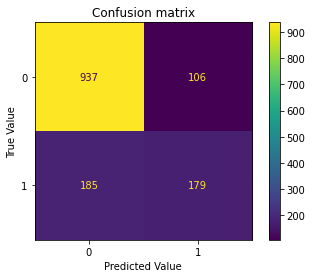

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(model, x_test, y_test)
matrix.ax_.set_title('Confusion matrix')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

### Classification report

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1043
           1       0.63      0.49      0.55       364

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



From the above table we get the **precision**, **recall** and **f1-score** for our model
***
## We find that our model is having an accuracy of 79%
***

***

**LET US BUILD FEW MORE MODELS FOR COMPARISON**

For the purpose of comparison, let us build a model using Support Vector Machine Classification using the same dataset we cleaned

***

# Support Vector Machine

In [104]:
from sklearn import metrics
model.svm = SVC(kernel='linear') 
model.svm.fit(x_train,y_train)
y_pred = model.svm.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7917555081734187

***
## We find that the accuracy using SVM we get more than 79%
***

# Ada Boost Classifier

In [105]:
model = AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7846481876332623

***
## We find that the accuracy using SVM we get more than 78.4%
***

# Comparison between the three models

***

We built models using three different algorithms and let us tabulate the accuracy we got for each type

* Logistic regression - 79%
* SVM - 79%
* Ada Boost - 78%

***

# The End